In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/drive/MyDrive/資料探勘/作業2/hw3/Iris_Process.csv")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_1=scaler.fit_transform(df)
df_2=pd.DataFrame(df_1,columns=df.columns)
df_2

,sepal length,sepal width,petal length,petal width,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [7]:
Start=time.time()
kMeans=KMeans(n_clusters=3,random_state=0).fit(df_2)
kmlb=kMeans.fit(df_2)
y_kmeans=kmlb.fit_predict(df_2)
End=time.time()
print(y_kmeans)
print("分群所花費時間:\n",End-Start)  #K-mean分類花費時間

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
分群所花費時間:
 0.05669736862182617


In [8]:
kmlb = df_2[y_kmeans== 0].values

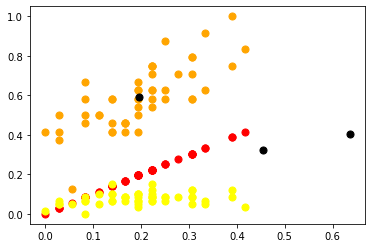

In [9]:
plt.scatter(kmlb[:,0],kmlb[:,0],s=50,c='red')
plt.scatter(kmlb[:,0],kmlb[:,1],s=50,c='orange')
plt.scatter(kmlb[:,0],kmlb[:,2],s=50,c='yellow')
plt.scatter(kMeans.cluster_centers_[:, 0],kMeans.cluster_centers_[:, 1],s=50,c='black')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score


In [11]:
len(kmlb)

50

In [12]:
km_add = df_2
km_add["Cluster"] = y_kmeans
km_add

,sepal length,sepal width,petal length,petal width,class,Cluster
0,0.222222,0.625000,0.067797,0.041667,0.0,0
1,0.166667,0.416667,0.067797,0.041667,0.0,0
2,0.111111,0.500000,0.050847,0.041667,0.0,0
3,0.083333,0.458333,0.084746,0.041667,0.0,0
4,0.194444,0.666667,0.067797,0.041667,0.0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,1
146,0.555556,0.208333,0.677966,0.750000,1.0,1
147,0.611111,0.416667,0.711864,0.791667,1.0,1
148,0.527778,0.583333,0.745763,0.916667,1.0,1


In [13]:
km_results = km_add.groupby("Cluster").sum()
km_results

,sepal length,sepal width,petal length,petal width,class
Cluster,,,,,
0,9.805556,29.541667,3.932203,3.000000,0.0
1,31.777778,20.291667,38.576271,40.125000,50.0
2,22.722222,16.041667,27.627119,25.541667,25.0


In [14]:
purityList=[]
total=0
for i in range(3):
    purity = km_results.loc[i].max()/km_results.loc[i].sum()
    purityList.append(purity)
    total = total + km_results.loc[i].sum()

print("純度:\n",purityList)
print("總和:\n",total)

純度:
 [0.6383326127317582, 0.2765934727065792, 0.2362651742395265]
總和:
 343.9828154425611


In [15]:
Total_purity=0
for i in range(len(purityList)):
    Total_purity = Total_purity+purityList[i]*(km_results.loc[i].sum()/total)
print("總純度:\n",Total_purity)  #總純度

總純度:
 0.3115527302515195


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27171 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_te

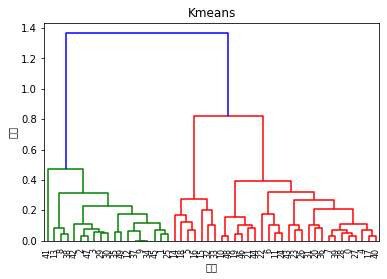

In [16]:
import scipy.cluster.hierarchy as sch   #分類結果圖
dendrogram = sch.dendrogram(sch.linkage(kmlb, method  = "ward"))
plt.title('Kmeans')
plt.xlabel('樣本')
plt.ylabel('分群')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27171 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_te

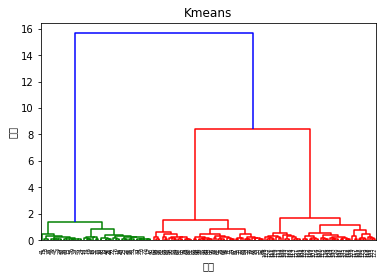

In [17]:
import scipy.cluster.hierarchy as sch   #分類結果圖
dendrogram = sch.dendrogram(sch.linkage(df_2, method  = "ward"))
plt.title('Kmeans')
plt.xlabel('樣本')
plt.ylabel('分群')
plt.show()

In [18]:
print("分群所花費時間:\n",End-Start)  #K-mean分類花費時間
print("總純度:\n",Total_purity) 

分群所花費時間:
 0.05669736862182617
總純度:
 0.3115527302515195
